# Condition differences

In the previous tutorials, we have assumed that the same events occur in all conditions of our experiments, and that they can be described by a single model. This is obviously a strong simplication: we typically have different conditions in our experiment to investigate differential effects. In this tutorial we will explore how we can take condition differences into account by:
- having events occur in a subset of the conditions
- varying gamma parameters by condition
- varying magnitudes by condition

In all cases, we also want to judge whether the new models are a better way to account for the data by applying LOOCV. Note that we will use the quick (and incorrect) LOOCV method throughout this tutorial in the interest of speed (but suppress the warning message). At the end we will explain how to do it correctly.

We perform these analyses on the same dataset as in Tutorial 3: a random dot motion task with a speed and an accuracy condition. In addition, sometimes participants had to use their left hands, sometimes their right hand.

First, we load these data and initialize the hmp model:

In [1]:
import os
import numpy as np
import xarray as xr
import hmp
import multiprocessing as mp
from mne.io import read_info

cpus = 5
#When using multiple CPUs explicitely setting the context of the multiprocessing is needed
#The following line works in most environment
mp.set_start_method("spawn")
#If multiprocessing errors/warning still present comment previous line and uncomment this one
# mp.set_start_method("fork")

epoch_data = xr.load_dataset(os.path.join('sample_data/sample_data.nc'))

#We create also the position array for the electrodes as we are going to need them to plot the event topographies
positions = read_info(os.path.join('sample_data/eeg/processed_0023_epo.fif'), verbose=False)

#And we transform as in the previous tutorial
hmp_data = hmp.utils.transform_data(epoch_data, apply_zscore='trial', n_comp=4)

init = hmp.models.hmp(hmp_data, epoch_data, event_width=50, cpus=cpus)


## Number of events

If you think there might be different numbers of events in different conditions of your experiment, it is good practice to apply separate backward estimation analyses (including LOOCV) to these conditions. As in the previous tutorial we base the maximum models on the `fit` method. See Tutorial 3 for details.

### Speed condition

In [2]:
# select the data
hmp_speed_data = hmp.utils.condition_selection(hmp_data, 'SP', variable='cue') # select the conditions where participants needs to be fast
init_speed = hmp.models.hmp(hmp_speed_data, epoch_data, sfreq=epoch_data.sfreq, cpus=cpus)

  0%|          | 0/53 [00:00<?, ?it/s]

Transition event 1 found around sample 9
Transition event 2 found around sample 26
Transition event 3 found around sample 49

All events found, refitting final combination.
Estimating 3 events model
parameters estimated for 3 events model


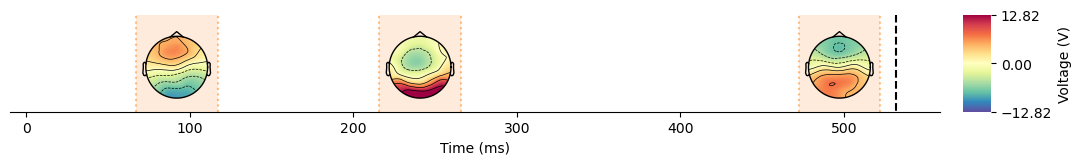

In [3]:
#apply fit function to build maximal model
estimates_speed = init_speed.fit()
hmp.visu.plot_topo_timecourse(epoch_data, estimates_speed, positions, init_speed, as_time=True)

For the speed condition, the `fit` function discovers three events. Next, we apply backward estimation and LOOCV.

Estimating all solutions for 2 events
Estimating all solutions for 1 events


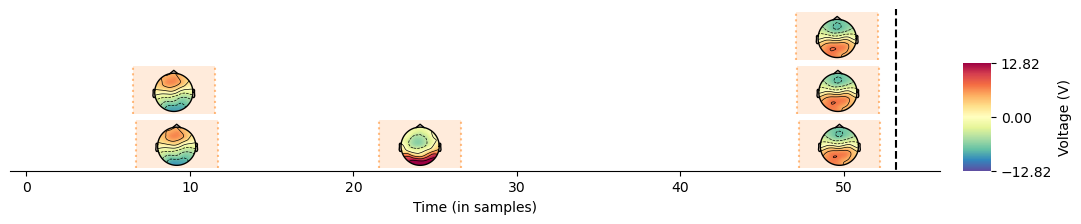

In [4]:
#backward estimation
backward_speed = init_speed.backward_estimation(max_fit=estimates_speed)
hmp.visu.plot_topo_timecourse(epoch_data, backward_speed, positions, init_speed)

LOOCV started for 1 model(s)
	LOOCV for backward estimation models with [3 2 1] event(s)
	  Estimating backward estimation model with 3 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo
	  Estimating backward estimation model with 2 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo
	  Estimating backward estimation model with 1 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo


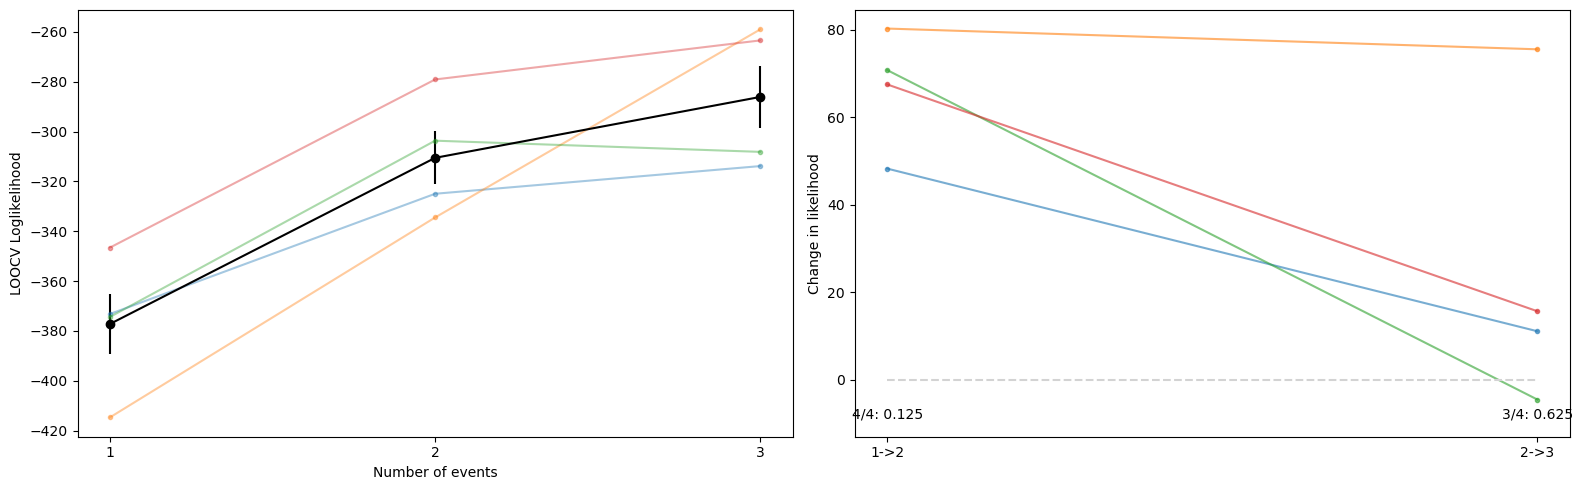

In [5]:
#LOOCV
loocv_model_speed = hmp.loocv.loocv(init_speed, hmp_speed_data, backward_speed, print_warning=False)
hmp.visu.plot_loocv(loocv_model_speed, pvals=True, test='sign', indiv=True, mean=True) #Colored shaded lines represent individuals

For the speed condition, we find clear evidence for three events.

### Accuracy condition

We repeat the same analysis for the accuracy condition.

In [6]:
# select the data
hmp_accuracy_data = hmp.utils.condition_selection(hmp_data, 'AC', variable='cue') # select the conditions where participants needs to be accurate
init_accuracy = hmp.models.hmp(hmp_accuracy_data, sfreq=epoch_data.sfreq, cpus=cpus)

  0%|          | 0/90 [00:00<?, ?it/s]

Transition event 1 found around sample 10
Transition event 2 found around sample 27
Transition event 3 found around sample 44
Transition event 4 found around sample 59
Transition event 5 found around sample 85

All events found, refitting final combination.
Estimating 5 events model
parameters estimated for 5 events model


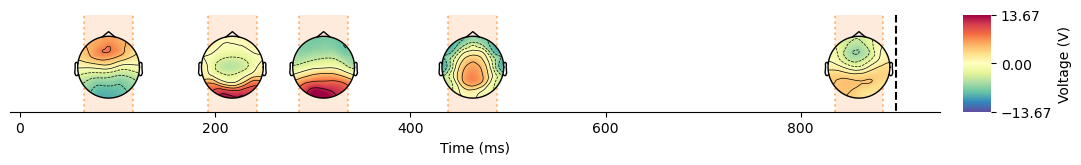

In [7]:
#apply fit function to build maximal model
estimates_accuracy = init_accuracy.fit()
hmp.visu.plot_topo_timecourse(epoch_data, estimates_accuracy, positions, init_accuracy, as_time=True)

For the accuracy condition, 2 more events are discovered. To determine how many events are 'real', we once again perform backward estimation and LOOCV.

Estimating all solutions for 4 events
Estimating all solutions for 3 events
Estimating all solutions for 2 events
Estimating all solutions for 1 events


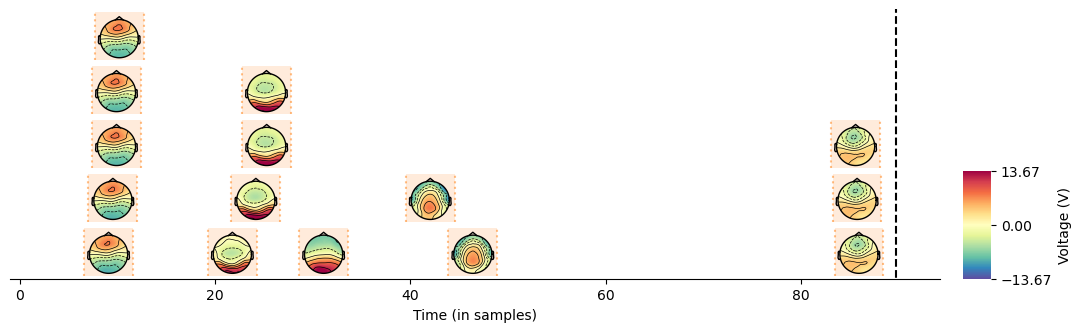

LOOCV started for 1 model(s)
	LOOCV for backward estimation models with [5 4 3 2 1] event(s)
	  Estimating backward estimation model with 5 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo
	  Estimating backward estimation model with 4 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo
	  Estimating backward estimation model with 3 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo
	  Estimating backward estimation model with 2 event(s)
		Calculating fit for participant processed_002

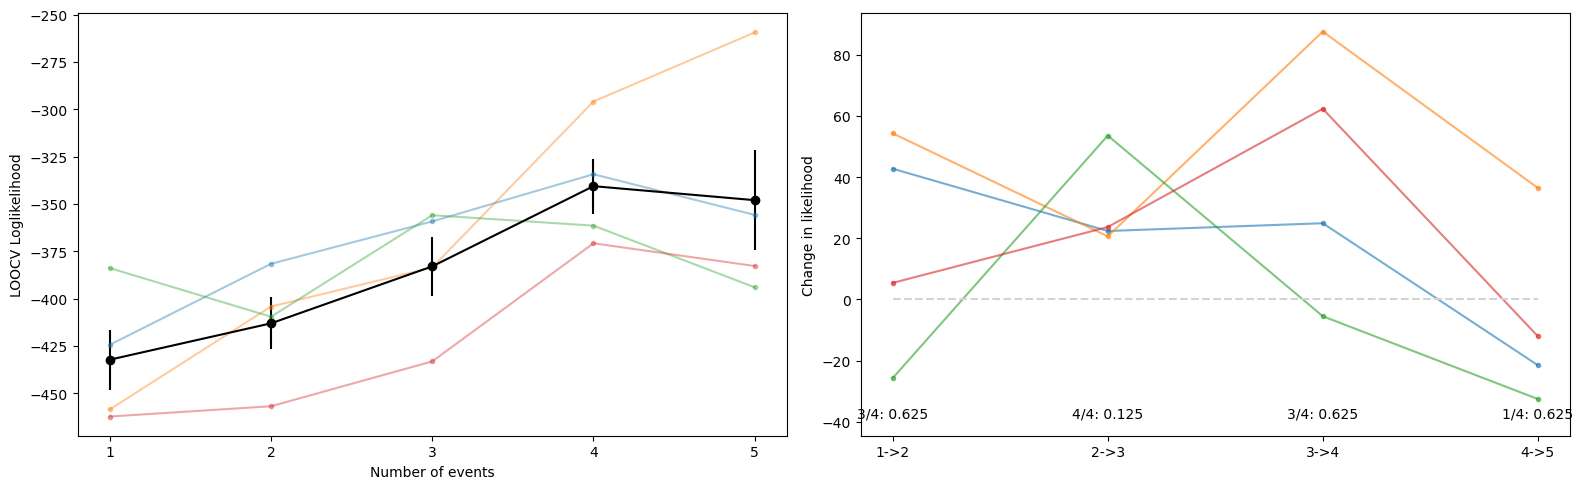

In [8]:
#backward estimation
backward_accuracy = init_accuracy.backward_estimation(max_fit=estimates_accuracy)
hmp.visu.plot_topo_timecourse(epoch_data, backward_accuracy, positions, init_accuracy)

#LOOCV
loocv_model_accuracy = hmp.loocv.loocv(init_accuracy, hmp_accuracy_data, backward_accuracy, print_warning=False)
hmp.visu.plot_loocv(loocv_model_accuracy, pvals=True, test='sign', indiv=True, mean=True) 

The LOOCV results show that we have evidence for 3 events. Based on previous knowledge and in the interest of the tutorial, we will go with 4 events nonetheless. 

Let's plot the two winning models together:

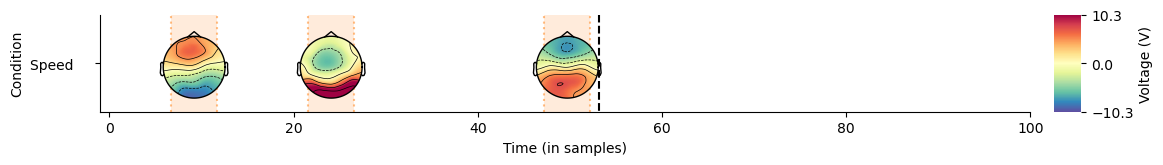

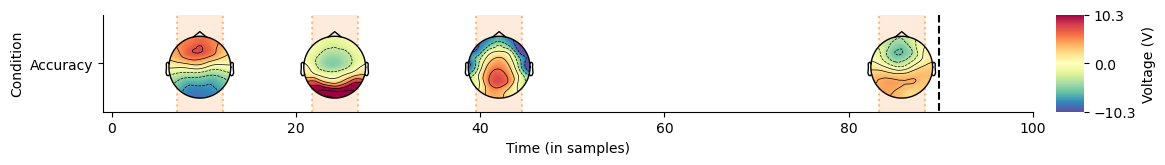

In [9]:
for condition in zip([backward_speed.sel(n_events=3), backward_accuracy.sel(n_events=4)],
                     [init_speed, init_accuracy],
                     [hmp_speed_data, hmp_accuracy_data],
                    ['Speed    ', 'Accuracy']):
    hmp.visu.plot_topo_timecourse(epoch_data, condition[0],
                          positions, condition[1],  
                          max_time=100,
                          ylabels={'Condition':[condition[3]]},vmin=-10.3,vmax=10.3)

Looking at the toplogies and time courses suggest that these models share the first, second, and last events, and that the Accuracy model has an extra intervening event.

### Combining speed and accuracy

Given this conclusion, we would like to combine these models, to see if we can have a comparable fit while using fewer parameters. To that, we will use `fit_single_conds`. For this we need to specify maps for the events and for the stages indicating which events appear in both models. These maps have rows for the conditions and columns for the events/stages. When the maps have negative values, this indicates missing events. In addition, we need to specify the condition we want to analyze on the full dataset. Let's looks at how we would define the combined speed-accuracy model:

In [10]:
# the magnitudes map indicates the events. We have two conditions, speed and accuracy, hence two rows. For speed the third event is missing, indicated by the -1.
mags_map = np.array([[0, 0, -1, 0],
                     [0, 0, 0, 0]])

# the parameters maps indicates the stages. Here, we indicate that stage 3 is missing for the speed condition. Obviously, this has to be congruent with magnitudes map.
pars_map = np.array([[0, 0, -1, 0, 0],
                     [0, 0, 0, 0, 0]])

# finally, we have to define the conditions we want to analyze:
conds = {'cue': ['SP', 'AC']} #dictionary with conditions to analyze as well as the levels.

Next we are going to fit the combined model, as starting parameter we use the four-event accuracy model (note that you could also first fit the best possible combined 4-stage, for example).

Condition "cue" analyzed, with levels: ['SP', 'AC']

Coded as follows: 
0: ['SP']
1: ['AC']

Magnitudes map:
0:  [ 0  0 -1  0]
1:  [0 0 0 0]

Parameters map:
0:  [ 0  0 -1  0  0]
1:  [0 0 0 0 0]

-----
Negative parameters. Note that this stage is left out, while the parameters
of the other stages are compared column by column. In this parameter map example:
[[ 0  0  0  0]
 [ 0 -1  0  0]]
the parameters of stage 1 are shared, as well as the parameters of stage 3 of
condition 1 with stage 2 (column 3) of condition 2 and the last stage of both
conditions.
Given that event 2 is probably missing in condition 2, it would typically
make more sense to let both stages around event 2 in condition 1 vary as
compared to condition 2:
[[ 0  0  0  0]
 [ 0 -1  1  0]]
-----

Estimating 4 events model
parameters estimated for 4 events model


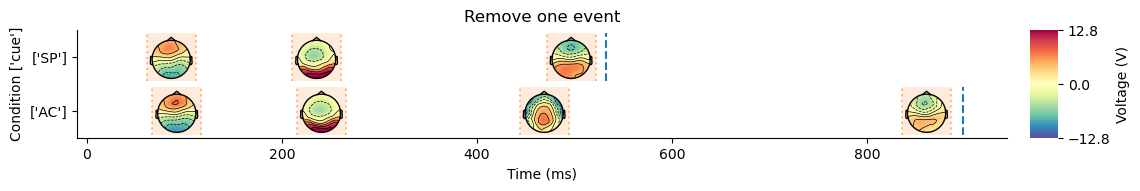

In [11]:
# we take the starting parameters from the accuracy model (you could also take the average)
mags4 = backward_accuracy.sel(n_events=4).magnitudes.dropna('event').data
pars4 = backward_accuracy.sel(n_events=4).parameters.dropna('stage').data

#fit the model - note that we use the full data again
model_stage_removed = init.fit_single_conds(magnitudes=mags4, parameters=pars4, pars_map=pars_map, mags_map=mags_map, conds=conds,  cpus=1)
hmp.visu.plot_topo_timecourse(epoch_data, model_stage_removed, positions, init, magnify=1, as_time=True, sensors=False, xlabel='Time (ms)', event_lines=True, colorbar=True, title="Remove one event") 


It is useful to check whether the rows of the maps correspond to the right conditions in the output of the function.

As we can see, we get the combined model that we expected. Given that this model has much fewer parameters (it estimates four topographies instead of seven), it is probably preferred over the original two models that we had. We can test this using LOOCV. We will apply LOOCV to the combined model and to the two separate models. If the added loglikelihood of the two separate models is not higher for a significant number of participants than the loglikelihood of the combined model, we prefer the combined model as it has fewer parameters.

In [12]:
loocv_speed = hmp.loocv.loocv(init_speed,hmp_speed_data, backward_speed.sel(n_events=3).dropna('event'), print_warning=False)
loocv_accuracy = hmp.loocv.loocv(init_accuracy,hmp_accuracy_data, backward_accuracy.sel(n_events=4).dropna('event'), print_warning=False)
loocv_combined = hmp.loocv.loocv(init, hmp_data, model_stage_removed, print_warning=False)

LOOCV started for 1 model(s)
	LOOCV for single model with 3 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo
LOOCV started for 1 model(s)
	LOOCV for single model with 4 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo
LOOCV started for 1 model(s)
	LOOCV for condition-based model with 4 event(s)
		Calculating fit for participant processed_0025_epo
		Calculating fit for participant processed_0023_epo
		Calculating fit for participant processed_0024_epo
		Calculating fit for participant processed_0022_epo


In [13]:
#sum likelihoods of speed and accuracy, this is possible as long as the datasets are completely independent
loocv_separate_models = loocv_speed.values + loocv_accuracy.values

#compare to the combined model
difference = loocv_combined - loocv_separate_models

print(difference.values)
print(np.sum(difference > 0))

[ 43.49312785 134.88248815  13.11893015 -48.7239809 ]
<xarray.DataArray 'loo_likelihood' ()> Size: 8B
array(3)


So, the combined model has a greater loglikelihood than the separate models for three out of four participants, even though the latter ones have way more freedom to fit the data. Here, we clearly prefer the combined model.

### Exercise 1:

Above we left out the third event of the speed condition, and assumed the last events were the same between the conditions. One could also think that the third event of the accuracy condition corresponds to the last event of the speed conditions. Finish the code below to test what happens given this assumption. 

In [14]:
# mags_map = np.array([[0, 0, 0 -1],
#                      [0, 0, 0, 0]])

# add pars map

# add condition definition

# fit combined model and visualize

## Different stage durations

If we look at the combined model, it seems that the duration of the penultimate stage should be modeled with different parameters for speed than for accuracy:

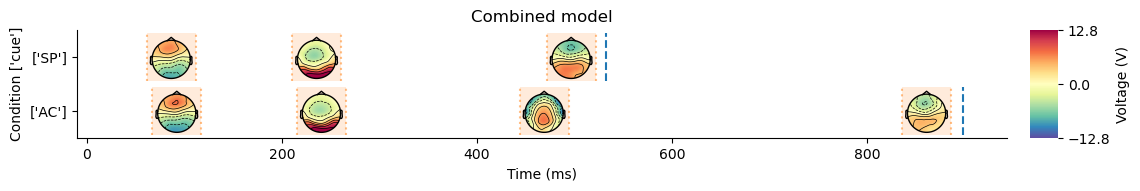

In [15]:
hmp.visu.plot_topo_timecourse(epoch_data, model_stage_removed, positions, init, magnify=1, sensors=False, time_step=1000/init.sfreq,xlabel='Time (ms)', event_lines=True, colorbar=True, title="Combined model") 

Fortunately, we can easily do that by changing the 'parameter map'. If we use different numbers for different conditions, we can indicate that the model is allowed to use different parameters for that stage.

Condition "cue" analyzed, with levels: ['SP', 'AC']

Coded as follows: 
0: ['SP']
1: ['AC']

Magnitudes map:
0:  [ 0  0 -1  0]
1:  [0 0 0 0]

Parameters map:
0:  [ 0  0 -1  0  0]
1:  [0 0 0 1 0]

-----
Negative parameters. Note that this stage is left out, while the parameters
of the other stages are compared column by column. In this parameter map example:
[[ 0  0  0  0]
 [ 0 -1  0  0]]
the parameters of stage 1 are shared, as well as the parameters of stage 3 of
condition 1 with stage 2 (column 3) of condition 2 and the last stage of both
conditions.
Given that event 2 is probably missing in condition 2, it would typically
make more sense to let both stages around event 2 in condition 1 vary as
compared to condition 2:
[[ 0  0  0  0]
 [ 0 -1  1  0]]
-----

Estimating 4 events model
parameters estimated for 4 events model


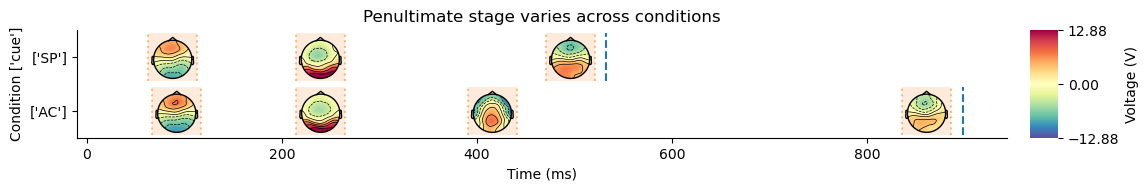

In [16]:
# the same as above: for speed the third event is missing, indicated by the -1.
mags_map = np.array([[0, 0, -1, 0],
                     [0, 0, 0, 0]])

# here we make a change, we now allow the penultimate stage to vary between conditions, indicated by the one in the second row
pars_map = np.array([[0, 0, -1, 0, 0],
                     [0, 0, 0, 1, 0]])

#unchanged from above
conds = {'cue': ['SP', 'AC']} 
mags4 = backward_accuracy.sel(n_events=4).magnitudes.dropna('event').data
pars4 = backward_accuracy.sel(n_events=4).parameters.dropna('stage').data

#fit the model 
model_different_stage = init.fit_single_conds(magnitudes=mags4, parameters=pars4, pars_map=pars_map, mags_map=mags_map, conds=conds)
hmp.visu.plot_topo_timecourse(epoch_data, model_different_stage, positions, init, magnify=1, sensors=False, time_step=1000/init.sfreq,xlabel='Time (ms)', event_lines=True, colorbar=True, title="Penultimate stage varies across conditions") 


As you can see this leads to the first events lining up better between the conditions. If we just look at the overall log-likelihood, we indeed see that it might explain the data better:

In [17]:
print('likelihood with different stage duration:' + str(model_different_stage.likelihoods.values))
print('likelihood first combined model:' + str(model_stage_removed.likelihoods.values))

likelihood with different stage duration:-1866.0154145944036
likelihood first combined model:-1906.7192696751881


You can test this properly in the next exercise using LOOCV.

### Exercise 2:
Apply LOOCV to this model and compare it to the first combined model (check cell 12 above). This is the way we typically increase the complexity of our models, until the point the LOOCV indicates that we do not explain the data better.

In [18]:
# #calculate LOOCV of the new model
# loocv_stage_diff = hmp.loocv.loocv(..., print_warning=False)

# #compare to previous model

We can also plot the results as bar plots or line plots, here with the error bars indicating standard errors between participants:

<Axes: xlabel='Cumulative stage durations from stimulus onset (ms)'>

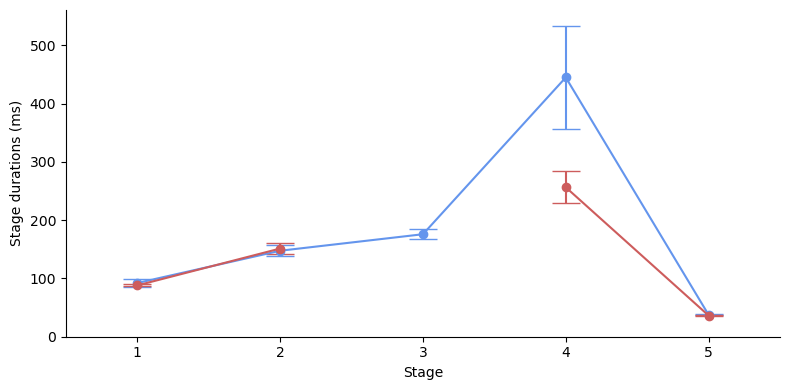

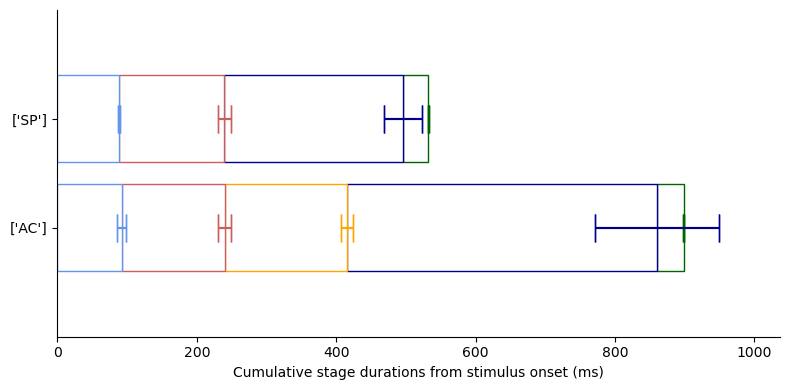

In [19]:
hmp.visu.plot_latencies(model_different_stage, init, errs='se',kind='point')
hmp.visu.plot_latencies(model_different_stage, init, errs='se',kind='bar')


## Different topographies

There was a second manipulation in this experiment: right vs. left hand. This should results in a different topology of the last event, which is probably associated with the response. It won't surprise you at this point that we can test this by specifying this in the magnitudes map. We now take all data again and fit four events, use the left and right response conditions, and let the last topology vary.

Condition "resp" analyzed, with levels: ['resp_left', 'resp_right']

Coded as follows: 
0: ['resp_left']
1: ['resp_right']

Magnitudes map:
0:  [0 0 0 0]
1:  [0 0 0 1]

Parameters map:
0:  [0 0 0 0 0]
1:  [0 0 0 0 0]

Estimating 4 events model
parameters estimated for 4 events model


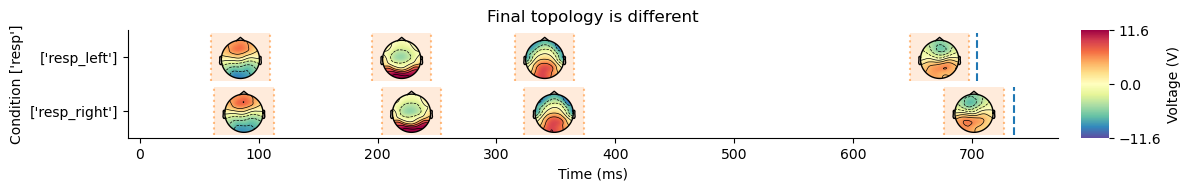

In [20]:
# Both condition have four stages this time, but the last topology can differ:
mags_map = np.array([[0, 0, 0, 0],
                     [0, 0, 0, 1]])

# As we now share all parameters, you don't have to specify them:
pars_map = None

# As condition we use the response hand
conds = {'resp': ['resp_left', 'resp_right']}

# we just take the accuracy model parameters as starting points
mags4 = backward_accuracy.sel(n_events=4).magnitudes.dropna('event').data
pars4 = backward_accuracy.sel(n_events=4).parameters.dropna('stage').data

#fit the model 
model_different_topographies = init.fit_single_conds(magnitudes=mags4, parameters=pars4, pars_map=pars_map, mags_map=mags_map, conds=conds)
hmp.visu.plot_topo_timecourse(epoch_data, model_different_topographies, positions, init, magnify=1, sensors=False, time_step=1000/init.sfreq,xlabel='Time (ms)', event_lines=True, colorbar=True, title="Final topology is different")

What you see is that left responses are right lateralized, and right responses left lateralized, exactly as you would expect. Again, you can use LOOCV to test this model.

### Exercise 3:

We made separate models for speed and accuracy, and for right and left responses. In this exercise, you will build a model that incorporates all conditions. Take these things into account:
- to specify multiple conditions, use a list of dictionaries (see below)
- if you repeat the same number across rows, this means topographies/stages are repeated. So if you conditions will be speed/left, speed/right, accuracy/left, accuracy/right, the last column of your magnitudes map should read 0, 1, 0, 1 – you don't expect different left responses for speed and accuracy.

In [21]:
# # You now have four conditions, with varying numbers of events
# mags_map = 
# pars_map = 

# # As condition we use both speed accuracy and the response hand
# conds = [{'cue': ['SP', 'AC']}, {'resp': ['resp_left', 'resp_right']}]

# # we again take the accuracy model parameters as starting points
# mags4 = backward_accuracy.sel(n_events=4).magnitudes.dropna('event').data
# pars4 = backward_accuracy.sel(n_events=4).parameters.dropna('stage').data

# #fit the model 
# model_four_conditions = init.fit_single_conds(magnitudes=mags4, parameters=pars4, pars_map=pars_map, mags_map=mags_map, conds=conds)
# hmp.visu.plot_topo_timecourse(epoch_data, model_four_conditions, positions, init, magnify=1, sensors=False, time_step=1000/init.sfreq,xlabel='Time (ms)', event_lines=True, colorbar=True, title="Four conditions")

## Correct LOOCV

In the code above we used the fast LOOCV procedure, which is incorrect but convenient for exploring your data. If you want to do these analyses correctly, you will have to use `loocv_func` and specify the funcion that you want to apply to your data. This function can also return multiple models which are then all used for LOOCV. Given that this can be rather complex, we provide an example function here:

In [22]:
# def backward_and_conds(hmp_model):
       
#     #fit backward model up to max_events
#     backward_model = hmp_model.backward_estimation(max_events=6)

#     #select 4 events model
#     four_model = backward_model.sel(n_events=4).dropna('event')
#     mags = four_model.magnitudes.dropna('event').data
#     pars = four_model.parameters.dropna('stage').data

#     #specify conditions
#     mags_map = np.array([[0, 0, -1, 0],
#                          [0, 0, 0, 0]])
#     pars_map = np.array([[0, 0, -1, 0, 0],
#                          [0, 0, 0, 0, 0]])
#     conds = {'cue': ['SP', 'AC']} 

#     #fit condition model
#     cond_model = hmp_model.fit_single_conds(magnitudes=mags, parameters=pars, mags_map=mags_map, pars_map=pars_map, conds=conds, verbose=False)
    
#     return [backward_model, cond_model]

This function expect an hmp_model as input, and returns one or more models - in this case two: a backward model and one condition-based model. It fits the first condition-based model that we estimated above.

We can use this function as follows, but note that it takes significant time to run, even with four participants!

In [23]:
# loocv_back_conds = hmp.loocv.loocv_func(init, hmp_data, backward_and_conds,func_args=[])

As you can see, you could also build an even more complex function that takes input arguments provided by `func_args`.

We can plot the results, in this case plotting the fit of the combined model between the 3 and 4 stage models of backward estimation.

In [24]:
# #specify combined model as additional point
# hmp.visu.plot_loocv(loocv_back_conds[0][0], pvals=True, test='sign', indiv=True, mean=True, additional_points = (3.5, loocv_back_conds[0][1]))

The combined model (purple dot) is displayed along the the backward-estimated models. We can test how it does in terms of LOOCV by comparing to the four-event model:

In [25]:
# loocv_back_conds[0][1].values - loocv_back_conds[0][0].sel(n_event=4).values

For three out of four participants, the combined model is better.

# Conclusion
In this tutorial, we explored the effects of different conditions. First we build a combined model that better explains the data than two separate models, even though it has way fewer parameters. Next, we made this model more complex by allowing stage distributions and/or topographies to vary across conditions. This is also how approach real datasets, where we continue this process until the LOOCV indicates that a more complex does not outperform the simple model.